# 11 時系列データと自然言語処理
11章では、時系列解析と自然言語処理について解説していきます。講義の前半では時系列解析について、後半では自然言語処理について扱います。...

## 11.1 今回の目標
キーワード：時系列データ、時系列データのEDA・モデリング



今回の目標は、  

1.   **時系列データとはどのようなデータであるのかを理解する**
2.   **時系列データの可視化ができるようになる**
3.   **時系列データの予測ができるようになる**

ことです。

従って今回は、まず時系列データとはどのようなデータであるのかを学びます。  
次に、時系列データのEDAについて学びます。  
そしてその後、時系列データの「未来」を予測する実際の手法について学びます。

後ほどご紹介しますが、時系列データは日常・ビジネスの至る所に存在します。  
そして、時系列データの性質を理解したり、未来のデータを予測することには大きなニーズがあります。  

今回の講義で、まずは時系列解析の入り口に立ってみましょう！

## 11.2 時系列データとモデリング
ゴール：時系列データとはどのようなデータであるのかを理解する


### 11.2.1 時系列データとは
キーワード：時間変化、数値、画像、音声、言語

まずは、時系列データとはどのようなデータであるのかについて理解しましょう。  

これまで扱ってきたテーブルデータは、個々のレコード（行）が個々の属性を持っており、それらが時間によって変化することは基本的にありません。  

対して、今回扱う時系列データとは、その名の通り**「時間に伴って変化するデータ」**のことです。

世の中には実に様々な時系列データが存在します。  

*   株価データ(時間に伴って数値が変化)
*   定期的に撮影した胃カメラのデータ(時間に伴って画像が変化)
*   工場現場の音声データ(時間に伴って音声が変化)
*   Twitterのツイートデータ(時間に伴って言語が変化)
*   etc...

と実に多様です。  
今回の講義では、１つの数値が時間に伴って変化する「単変量時系列データ」を主に扱います。  

以下の図で、これまで扱ってきたテーブルデータと単変量時系列データの違いを確認することができます。




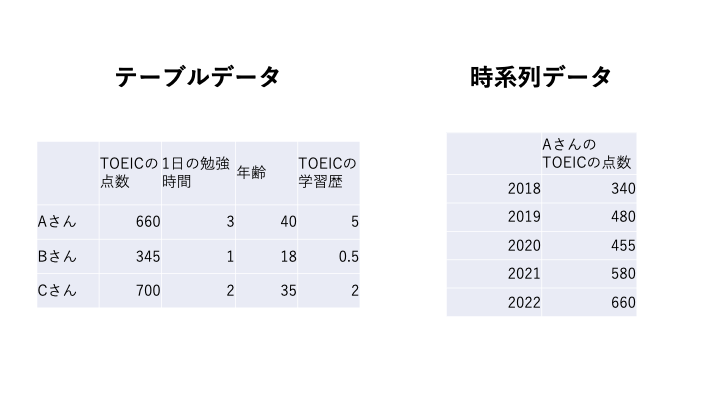

### 11.2.2 時系列データを「予測する」とは
キーワード：さまざまな予測

\\これまでのテーブルデータと同様に、時系列データも学習器によって予測するニーズがあります。  
しかし、これまでのテーブルデータの予測とは少し考え方・手法が異なるため、詳しく見ていきましょう。  

時系列データでは、様々な予測があります。

*   株価データ(時間に伴って数値が変化)
    *   将来の株価を予測
*   定期的に撮影した胃カメラのデータ(時間に伴って画像が変化)
    *   3000人・1ヶ月分の胃カメラデータをもとに、ある人の胃が異常であるかを予測(時系列分類)
*   工場現場の音声データ(時間に伴って音声が変化)
    *   ある時点の音声が、正常な音声か、故障している音声であるかを予測(異常検知)
*   Twitterのツイートデータ(時間に伴って言語が変化)
    *   トピックの流行を予測
*   etc...

このように時系列データにおける予測は、非常に多岐にわたります。今回は、この中でも、「単変量時系列データにおける将来予測」を行います。  

本講義で扱ってきたテーブルデータでは、まだ見ぬ新しいレコードに対して、与えられた説明変数から目的変数を予測するという予測を扱ってきました。
この際、inputとして説明変数を受け取り、outputとして目的変数の予測値を出力する学習機を作成します。  
こうして作成した学習機に、新しいレコードの説明変数を学習機に入力することで新しいレコードの予測を得ることができます。

対して、単変量時系列データにおける将来予測では、まだ見ぬ時点のデータをこれまでのデータを用いて予測を行います。  
この際、inputとして予測したい時点のn期前までの時系列データを受け取り、outputとして予測したい時点の予測値を出力する学習機を作成します。  
こうして作成した学習機を用いて、まだ見ぬ時点のデータを、既に持っているデータから予測を行います。  

この違いに注意しながら、引き続き時系列における予測について学習していきましょう。

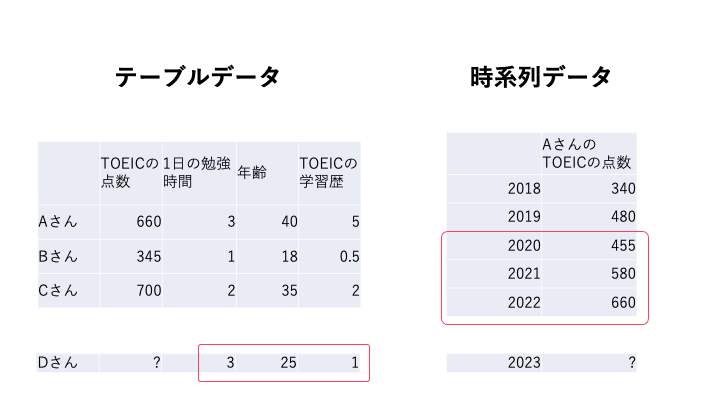

### 11.2.3 時系列データを予測する手法
キーワード：統計的アプローチ、機械学習的アプローチ

以後、「単変量時系列データにおける将来予測」を、単に「時系列データを予測する」ということにします。

時系列データにおける予測手法は、多岐に渡ります。主に「統計的アプローチ」と「機械学習的アプローチ」の二つに分類することができます。

統計的アプローチでは、時系列データが特定の統計的性質を持つという前提に基づき予測を行います。また、モデルのパラメータとデータとの関係がわかりやすいため、予測がどのように行われているかを比較的容易に理解することができます。しかし、特定の統計的性質を持つという前提にそぐわない場合は、予測性能が低下する可能性があります。

機械学習的アプローチでは、基本的にはデータに統計的性質を求めることはなく、非線形な関係や複雑なパターンを捉えながら予測を行うことができます。ただし、予測過程が複雑になるため、予測がどのように行われているかを理解することは難しいです。より多くのデータを学習することで、より高い予測精度を期待できます。

それぞれどのような手法があるかを見てましょう。


*   統計的アプローチ  
    *   ARIMA(回帰モデル)系
    *   SSM(状態空間モデル)系
*   機械学習的アプローチ
    *   非時系列手法
        *   ランダムフォレスト、サポートベクターマシンなど
    *   時系列手法
        *   RNN(リカレントニューラルネットワーク)、Transformerなど

このように様々あります。今それぞれがどんなものかわかる必要はありません。  
この中でも今回は、一番基本的であるARIMA系のモデルを用いて時系列データを予測する手法を学びます。  
今回の講義で、時系列データの分析や予測の基礎を学んでいきましょう。




## 11.3 時系列データの観察
ゴール：時系列データの可視化ができるようになる

### 11.3.1 EDAの重要性
キーワード：季節変動、トレンド、異常値や外れ値の発見

まずは時系列データをEDAするところから始めましょう。  
これまでの講義・コンペを通してテーブルデータにおけるEDAの重要性は身にしみてきているかと思います。  
やはり時系列においてもEDAは重要です。時系列においてもEDAを行う理由はいくつもありますが、ここでは２つ理由を挙げておきます。
- 季節変動やトレンドを明確に把握できる  
    - 数字の羅列を眺めるのではなく、プロットしたものをみて知見を得たり、後述のSTL分解などを行なうことで時系列データの特徴を明確に把握できます。
- 異常値や外れ値の発見が容易になる
    - 時系列データは季節性などがあることから、一目見てデータの異常値・外れ値を判断することは難しいです。季節性やトレンドを分解することで、異常値や外れ値の検出を行うこともできます。  

それでは、早速EDAを行なっていきましょう！


### 11.3.2 時系列データのプロット
キーワード ： プロット、周期

今回は、まず太陽黒点数の時系列データを用いて、時系列データの扱いについて学んでいきます。  
まずは、以下のセルを実行して、今回扱うデータを取得しましょう。

In [ ]:
import statsmodels.api as sm
import pandas as pd

sunspot_dataset = sm.datasets.sunspots.load_pandas().data

#外れ値を削除
sunspot_dataset = sunspot_dataset.iloc[2:]

#データの形式を整理
sunspot_dataset.index = pd.to_datetime(sunspot_dataset["YEAR"].astype(int), format='%Y')
sunspot_dataset = sunspot_dataset["SUNACTIVITY"]

今回扱う太陽黒点のデータは、1702年から2008年までの期間で、1年おきに観測された太陽黒点の数のデータセットです。  
以下のセルも実行して、まずは簡単に出力してみましょう。

In [ ]:
#出力
print("データの型は", type(sunspot_dataset), "です\n")
sunspot_dataset

データの型は <class 'pandas.core.series.Series'> です



YEAR
1702    16.0
1703    23.0
1704    36.0
1705    58.0
1706    29.0
        ... 
2004    40.4
2005    29.8
2006    15.2
2007     7.5
2008     2.9
Name: SUNACTIVITY, Length: 307, dtype: float64

まず、sunspot_datasetはpandasのSeries型で保持されていることがわかります。  
また、やはり1年おき、300年ほどのスパンで太陽黒点数が保持されていることも確認できます。  
しかしこれだけを見てもデータについてはさっぱりわかりません。  
数値で保持されている時系列データは、プロットすることでデータ理解が大幅に捗ります。早速プロットしてみましょう。

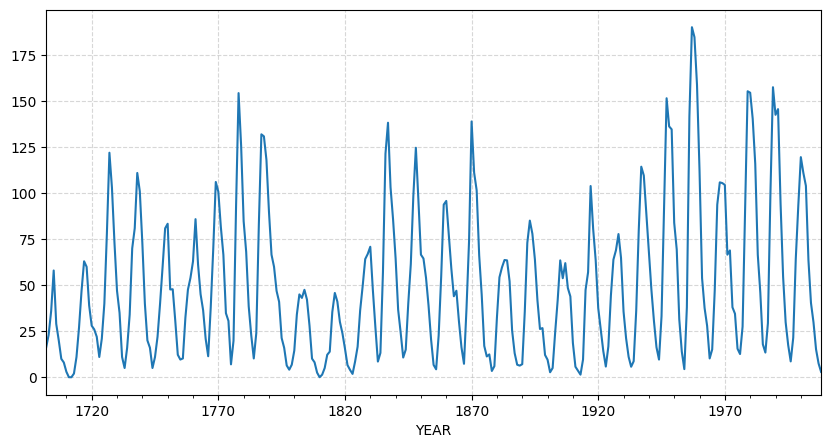

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

sunspot_dataset.index = pd.to_datetime(sunspot_dataset.index, format="%Y")

#見やすいようにグラフの大きさを調整
plt.figure(figsize=(10, 5))
sunspot_dataset.plot()

# グリッド線を追加
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

グラフにすると、データのあり方がよく見えてきます。  
太陽黒点の数は、年によって大きく増減があることがわかります。また、増加して減少するという一連の流れを繰り返していることも見て取ることできます。  
太陽黒点の周期は平均およそ11年とされています。  
実際、1720年〜1820年の100年をみてみると、9回のピーク（局所的に黒点数が高くなっている点）が発生しています。11×9=99年であることから、整合性のある結果であることがわかります。

### 11.3.3 STL分解
キーワード：STL分解

先ほど太陽黒点のデータをプロットし、その性質を確認しました。  
しかし、まだまだ詳しくデータを観察することができます。  
太陽黒点数は、100年、200年という単位で見たときに、増加傾向にあるか/減少傾向にあるか/横ばいか、などはパッと見てもわかりません。  
時系列データをより詳しくEDAするために、ここではSTL分解を行ってみましょう。

[STL分解(Seasonal and Trend decomposition using Loess)](https://www.scb.se/contentassets/ca21efb41fee47d293bbee5bf7be7fb3/stl-a-seasonal-trend-decomposition-procedure-based-on-loess.pdf)とは、時系列データをトレンド成分、季節成分、残差成分に分解する手法です。  
式で書くと、  


```
T時点のデータ = トレンド成分 + 季節成分 + 残差成分
```

と書き表せます。

トレンド成分とは、時系列データにおける長期的な傾向や変化を表します。  

季節成分とは、時系列データに含まれる一定周期で変化する成分を表します。  

残差成分とは、時系列データにおいて季節成分とトレンド成分を除いた残りの成分を表します。残差には、予測誤差やランダムなノイズが含まれます。  

このように分解してプロットすることで、「データの大枠の傾向」「周期的な変動」をよりわかりやすく可視化することができます。  

以下のセルを実行し、STL分解を実際に行ってみましょう。

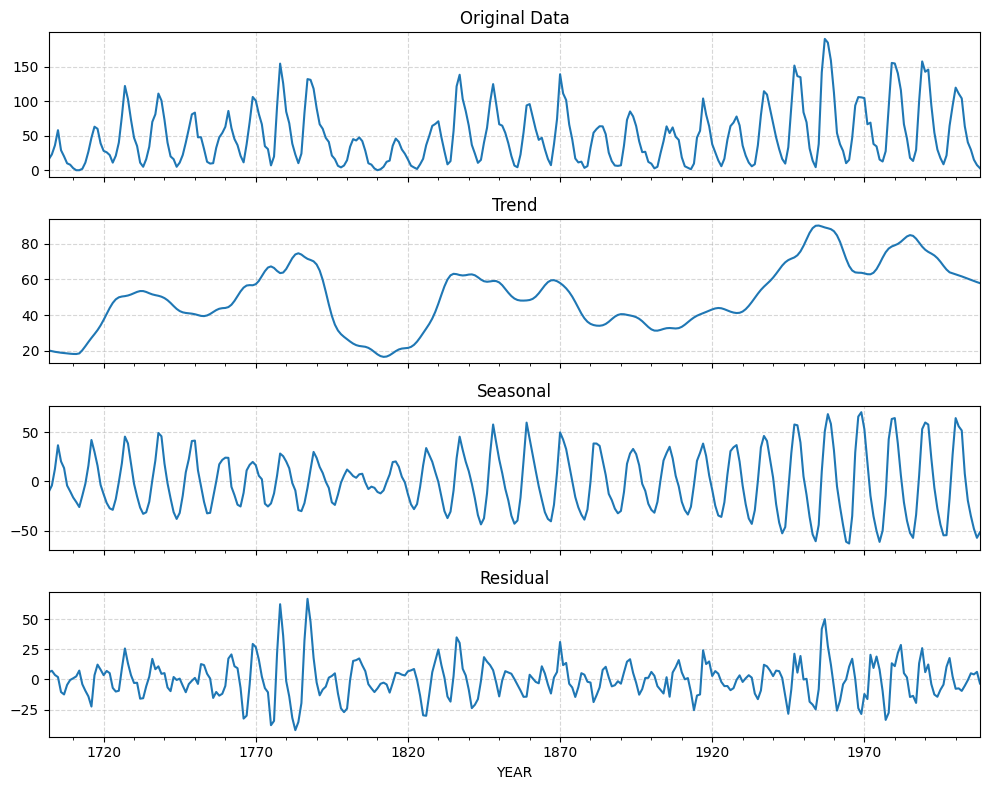

In [ ]:
from statsmodels.tsa.seasonal import STL

# STL分解
stl = STL(sunspot_dataset, period=11)
res = stl.fit()

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

sunspot_dataset.plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

それでは、STL分解の結果を順に確認していきましょう。  

トレンド成分(Trend)を見ることで、データの長期的な傾向を確認することができます。  
トレンドは不規則に上下しているように見えますが、この期間では緩やかに増加傾向にあると見て取れます。  

季節成分(Seasonal)を見ることで、データの季節的な性質を確認することができます。  
STL分解を行ってから確認すると、より明白に季節性の存在を確認できます。  

残差成分(Residual)は、予測誤差やノイズを表しますが、不規則な形をしています。  

STL分解することにより、データの傾向が掴みやすくなったことがわかります。  

## 11.4 ARMAモデルの定性的理解
ゴール：定常な時系列データの予測手法を定性的に理解する

一通りEDAを行い、データについての理解を深めたところで、本題の予測に入っていきましょう。  

先述の通り、時系列データのまだ見ぬ将来を予測する手法はたくさんあります。  
その中でも今回は、統計的アプローチである、ARMA、ARIMAモデルを用います。  
統計的アプローチであるARIMA系の予測モデルは、予測モデルの意味合いを比較的理解しやすく、初めて学ぶ時系列予測モデルとして適しています。  
ARMAモデルの進化系としてARIMAモデルがあります。まずはARMAモデルについて学習していきましょう。

今回学習するARMAモデルは、ARモデルとMAモデルを合体させたものです。  
ここでは簡単に、ARモデルとMAモデルの意味について確認しましょう。

### 11.4.1 ARモデルの定性的理解
キーワード：ARモデル、過去の観測値

ARモデル（自己回帰モデル, Autoregressive model）では、予測したいデータの過去の値の定数倍を足し合わせることで、未来のデータを予測します。  

具体的には、ARモデルは以下の式によって表されます。

\begin{aligned}
X_t &= c + φ_1 X_{t-1} + φ_2X_{t-2} + ... +φ_pX_{t-p} + ε_t \\
    &= c + \sum^p_{i=1}φ_iX_{t-i} + ε_t
\end{aligned}

ここで、  
X_t ：時刻tでの時系列データXの観測値  
φ_i：時刻t - iの時系列データXの係数  
ε_t：時刻tでの誤差項  
p : 予測に用いる過去の時系列データXの総数（次数）  
c： 定数項  
です。  
過去のデータをうまく足し合わせることによって、次の時点のデータを予測します。  



今回の太陽黒点データをもとに説明すると、X_tはある年の太陽黒点の数を表しています。  
φ_iは予測したい年のi年前の黒点数が、予測したい年の黒点数にどのような影響を与えているかを表しています。φ_iの値の大きさ（絶対値）が1に近いほど現在の値に大きな影響を与え、φが0に近い場合はほとんど影響がないと解釈できます。また、φ_iの符号（正または負）はi年前の黒点数が予測したい年の黒点数に対して正の影響を与えるか、それとも負の影響を与えるかを表しています。  

過去の太陽黒点数をもとに、将来の太陽黒点数を予測するということは、自然な発想と言えます。

### 11.4.2 MAモデルの定性的理解
キーワード：MAモデル、過去の誤差項

MAモデル（移動平均モデル, Moving Average model）では、予測したいデータの過去の誤差項（予測値と実際の値との差）の定数倍を足し合わせることで、未来のデータを予測します。

具体的には、MAモデルは以下の式によって表されます。



\begin{aligned}
X_t &= c + ε_t + θ_1ε_{t - 1} + θ_2ε_{t - 2} + ... + θ_qε_{t - q}\\
    &= c + ε_t + \sum^q_{i=1}θ_iε_{t - i}
\end{aligned}

ここで、  
X_t ：時刻tでの時系列データXの観測値  
ε_t：時刻tでの誤差項  
θ_i：時刻t - i の誤差項εの係数  
q : 予測に用いる過去の誤差項の総数（次数）  
c： 定数項  
です。  

ARモデルと似たような式で表されていますが、MAモデルでは過去の誤差項を用いて将来の値を予測しています。  

一見理解しがたいことですが、誤差項を「予測値からの上振れ/下振れ」という風に捉えると、定性的に理解することができます。  

例として株価を用いて説明します。  
ある日の株価を10000円として予測していたとします。対して、実際の株価は11000円であったとします。この場合、誤差は+1000円で、「予測より上振れていた」と捉えられます。この場合、「次の日は少し高めに予想しよう」と考えるかもしれません。  

このように、過去の予測誤差は、将来の値を予測するにおいて有用である場合があります。

### 11.4.3 ARMAモデルの定性的理解
キーワード：ARモデル、MAモデル、ARMAモデル

ARMAモデル（自己回帰移動平均モデル, Autoregressive Moving Average model）では、予測したいデータの過去の値と過去の誤差項の両方を使用します。具体的には、過去のデータの定数倍と過去の誤差項の定数倍を足し合わせることで、未来のデータを予測します。  

具体的には、ARMAモデルは以下の式によって表されます。



\begin{aligned}
X_t &= c + φ_1 X_{t-1} + φ_2X_{t-2} + ... +φ_pX_{t-p} + ε_t + θ_1ε_{t - 1} + θ_2ε_{t - 2} + ... + θ_qε_{t - q}\\
    &= c + ε_t + \sum^p_{i=1}φ_iX_{t-i} + \sum^q_{i=1}θ_iε_{t - i}
\end{aligned}

ここで、  
X_t ：時刻tでの時系列データXの観測値  
φ_i：時刻t - iの時系列データの係数  
ε_t：時刻tでの誤差項  
θ_i：時刻t - i の誤差項εの係数  
p : 予測に用いる過去の時系列データXの総数（観測値の字数）   
q : 予測に用いる過去の誤差項の総数（誤差項の次数）  
c： 定数項  
です。  

ARMAモデルでは、過去の観測値と誤差項を用いて、将来の値を予測します。

##11.5 ARMA過程による定常時系列予測  
ゴール：定常な時系列データの予測ができるようになる

### 11.5.1 自己相関
キーワード：自己相関

ARMAモデル（に限らず統計的アプローチの時系列モデル全般）では、「予測する時系列データは、過去の値に依存して将来の値が決まる」ことを前提にしています。  
したがって、今回扱う時系列データが過去の値と相関を持っていることを確認しておきましょう。  

確認には、過去のデータとの相関である「自己相関係数」を用います。  


自己相関係数とは、「現在のデータとk期前のデータとの相関」を計算したものになります。  
時差kにおける自己相関係数を求める計算式は以下のように表すことができます。

\begin{aligned}  
\rho_k = \frac{\sum_{t=k+1}^{n} (X_{t}-\bar{X})(X_{t-k}-\bar{X})}{\sum_{t=1}^{n} (X_{t}-\bar{X})^2}
\end{aligned}

ここで、  
ρ_k：時差kにおける自己相関係数  
X_t：時刻tでの時系列データXの観測値  
𝑋¯：時系列データZの平均値  
です。  

この自己相関係数ρ_kは、-1から1までの値を取り、1に近いほど強い正の相関、-1に近いほど強い負の相関を示し、0に近いほど相関がないことを示します。つまり、自己相関係数を計算することで、過去のデータが現在のデータにどの程度影響しているかを把握することが可能になります。

statsmodelsライブラリの、plot_acf関数を使えば簡単に自己相関係数を計算しグラフを書くことができるので、早速確認してみましょう。

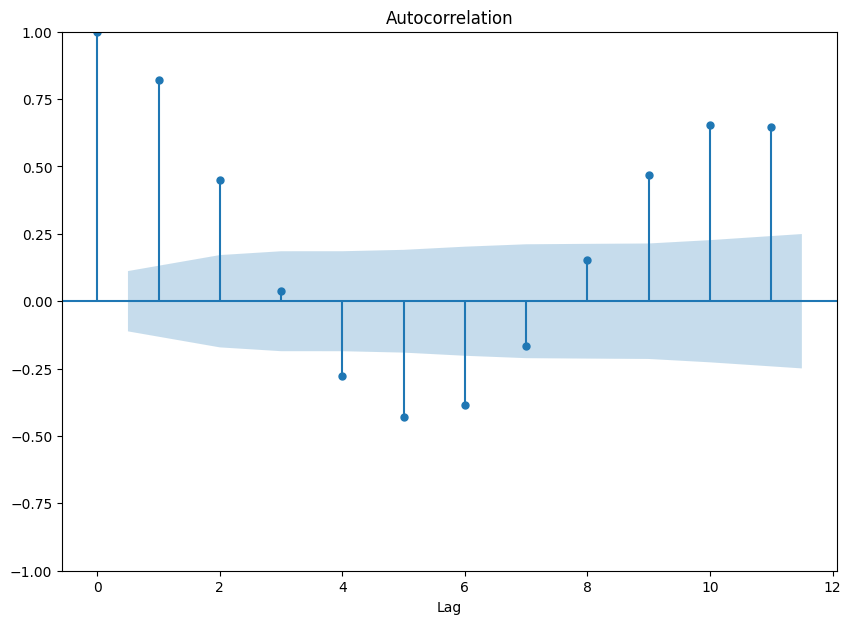

In [ ]:
#自己相関を計算・プロットするplot_acf関数をインポート
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 7))
#自己相関をプロット。lags=22と指定することによって、11年分(1周期分)の自己相関を計算
plot_acf(sunspot_dataset, lags=11, ax = ax)
plt.xlabel('Lag')
plt.show()

このグラフは、太陽黒点数データの各時差(Lag)tにおける自己相関係数をプロットしたデータです。  

横軸が0の時点は時差0を意味し、自分自身との相関を表すので自己相関係数が1になっています。  
「自己相関係数がない」場合の信頼区間が青い範囲になります。青い範囲より外側にある点は、「その時差において、自己相関が存在する」と言えます。  
今回は、自己相関が減衰振動のような形をしており、一部信頼区間の内部に入ってしまっていますが、年によっては強い自己相関があることがわかります。

### 11.5.2 定常性
キーワード：ADF検定、仮説検定

ARMAモデルでは、時系列データに「定常性」がないとうまくデータを予測することができない可能性があります。  
定常性とは、時間の推移に対して時系列データが安定的に推移することを指します。  
具体的には、各時点での時系列データの期待値が一定であり、自己相関が時間差にのみ依存することを意味します。（厳密には弱定常性といいます）  
これはつまり、時系列データが定常であれば時間によらずデータの性質が一定であるということです。過去のデータの特徴から将来のデータを予測できることが期待されます。

対して、定常性がないデータを非定常なデータといいます。非定常なデータは、時間を追うごとに時系列データの性質が変わります。

時間を追うごとに時系列データの性質が変わってしまうと、過去のデータを用いて学習機を作成しても、未来のデータへの当てはまりが信頼できなくなります。   



それでは、太陽黒点数データについて定常性があるかを確認してみましょう。  
定常性が存在するかについては、ADF検定というものを用いて確認することができます。  
pythonにはADF検定を行う為のモジュールがあり、簡単に検定を行うことができます。

In [ ]:
#ADF検定を行うことができるモジュールをインポート
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(sunspot_dataset)

# 結果を表示
# print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
# print('臨界値\t:')
# for key, value in result[4].items():
#     print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。")
else:
    print("時系列データは定常であるとは言えません。")

ADF検定	: -2.874117
p値	: 0.048442
臨界値	:
	1%	: -3.452
	5%	: -2.871
	10%	: -2.572
時系列データは定常であると考えられます。


ADF検定は仮説検定の一種です。  
ADF検定では、あえて与えられた時系列データが「定常でない」と仮定してデータを観測しています。  
そして、「定常でない」という仮定において、与えられた時系列データが観測される確率を計算します。その確率が極めて低い（5%未満）であれば、「定常でない」という仮定が間違っていたとして、「定常なデータである」と判断できるわけです。  
ここで計算される確率をp値と言います。  
今回のp値は4.8%、つまり「定常でないという仮定の元で、太陽黒点データが観測される確率は4.8%」ということになります。  

従って太陽黒点データは定常であると言えます。安心してARMAモデルで予測することができます。

### 11.5.3 ARMAモデルの次数決定
キーワード：AIC

まず、これまでARMAモデルについて学んだことをまとめましょう。


*   予測の方法
    *   一定期間の過去の観測値と一定期間の過去の誤差項から、将来の値を予測
*   必要な統計的性質
    *   自己相関（過去の観測値が将来の観測値に影響を与えている）
        *   自己相関係数をプロットして確認
    *   定常性（データの性質が時間によらず一定）
        *   ADF検定で確認



そして、ARMAモデルは以下の式で表されるのでした。

\begin{aligned}
X_t &= c + φ_1 X_{t-1} + φ_2X_{t-2} + ... +φ_pX_{t-p} + ε_t + θ_1ε_{t - 1} + θ_2ε_{t - 2} + ... + θ_qε_{t - q}\\
    &= c + ε_t + \sum^p_{i=1}φ_iX_{t-i} + \sum^q_{i=1}θ_iε_{t - i}
\end{aligned}

長い間ARMAモデルの説明を行ってきましたが、これからARMAモデルでの予測を行っていきます。

ARMAモデルでは、「何期間前までの観測値・誤差項を将来の値を予測する際に用いるか」 = 「p,qの値（次数）を幾つにするか」が重要になります。  
次数は高ければ良いというわけではありません。  
次数が高くなるほどモデルは複雑になり、過学習を起こし得るからです。  

今回は、AIC(赤池情報基準, Akaike's Information Criterion)を用いて、予測に用いる観測値・誤差項それぞれの適切な次数を推定します。

AICは、以下の式で表されます。


$$\text{AIC} = 2k - 2\ln(L)$$

ここで、
k：モデルのパラメータ数（複雑さ）  
L：最大尤度（モデルのデータへの適合度）  
です。  
AICの値が小さいモデルほど、データへの適合度が高く（つまり尤度が高い）、かつモデルがシンプルで過学習の恐れが少ない（つまりパラメータ数が少ない）と判断されます。  

したがって、AICの値が低い期間の組み合わせを選択し、適切な予測モデルを作成します。

今回の太陽黒点データは、11年周期のデータですので、予測に用いる過去の観測値・誤差項の最大次数をそれぞれ11としてグリッドサーチを行い、AICが最も低い組み合わせを選択してみましょう。

In [ ]:
#データセットを訓練データとテストデータに分割
#今回はデータセット全体のうち最新のデータ5%をtestデータ、古い95%のデータをtrainデータとします
len_test = int(0.05 * len(sunspot_dataset))
train = sunspot_dataset[:len(sunspot_dataset) -len_test]
test = sunspot_dataset[len(sunspot_dataset)-len_test:]

In [ ]:
#このセルの実行には時間がかかります(5,6分)
import statsmodels.api as sm
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# まずはモデルのパラメータの範囲を設定します
max_ar =11  # ARの最大次数
max_ma = 11  # MAの最大次数

# 最小AICを無限大で初期化します
best_aic = np.inf
best_order = None

# すべてのパラメータの組み合わせに対してモデルをフィットします
for p in range(max_ar+1):
    for q in range(max_ma+1):
        try:
            # モデルを作成
            # pが予測に用いる過去の観測値の数、qが予測に用いる過去の誤差項の数です
            # ARIMAと書いてありますが、(p, 0, q)の中央が0である場合、ARMAモデルとなります
            tmp_mdl = ARIMA(train, order=(p, 0, q), freq = "AS")
            result = tmp_mdl.fit()
            tmp_aic = result.aic
            # AICが小さい場合は、モデルとパラメータを更新します
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, q)
        except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 2429.65151 | order: (8, 6)


今回のARMAモデルによる太陽黒点データの予測モデルでは、過去の観測値を8年、誤差項を6年分用いて将来の値を予測するモデルが、AICを最小にすることがわかりました。  

### 11.5.4 ARMAモデルでの予測
キーワード：時系列データの予測

それでは、長くなりましたが実際にARMAモデルを用いて予測を行い、結果をプロットするところまでやってみましょう。

Mean Squared Error: 200.68465218928833


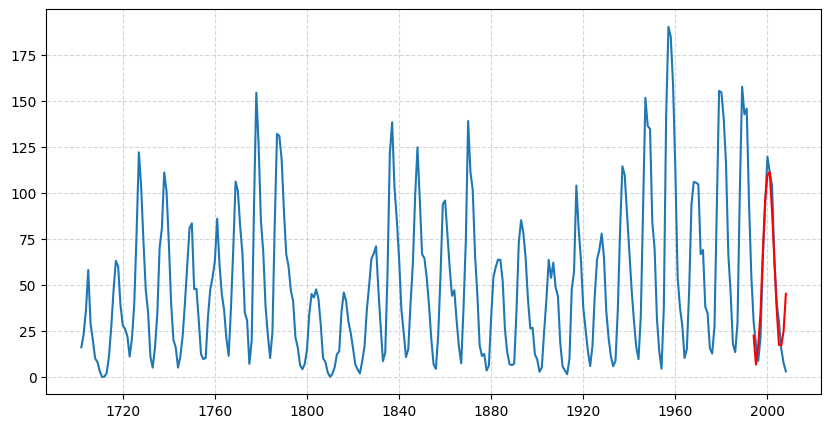

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#このセルの実行には時間がかかります。
from statsmodels.tsa.arima.model import ARIMA

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.grid(True, linestyle='--', alpha=0.5)

#AICの結果から、過去の予測値8年分、誤差項6年分を用いて将来の値を予測します
arma_model = ARIMA(train, order=(8, 0, 6), freq = "AS")
result = arma_model.fit()
forecast = result.forecast(len_test)

#青線（デフォルト）で大元のデータを表示
ax.plot(sunspot_dataset, ls="-")
#赤線で予測結果を表示
ax.plot(forecast, ls="-", color="r", label="predicted")

from sklearn.metrics import mean_squared_error

# 予測データと実際のデータのMSEを計算
mse = mean_squared_error(test, forecast)

print("Mean Squared Error:", mse)

かなり精度よく、未知のtestデータを予測することができました。  
このようにして、定常な時系列データの将来の値を予測することができます。

## 11.6 ARIMA過程による非定常時系列モデリング

ゴール：非定常なデータでも、時系列データの予測ができるようになる

先述の通り、ARMAモデルでは、定常性（データの性質が時間によらず一定）を仮定していました。  
しかし、現実には定常でない時系列データはたくさんあります。それらの予測を行えないというのは不便です。  

ARMAモデルを非定常なデータセットにも使えるようにしたものが、これから学ぶARIMAモデル(自己回帰和分移動平均, Autoregressive integrated moving average model)です。  

様々な時系列データにおいて予測モデルを構築できるようになるためにARIMAモデルについて学びましょう。

今度は、大気中の二酸化炭素（CO2）の濃度を週ごとに記録した時系列データを用います。  
具体的には、アメリカ合衆国ハワイ州のマウナロア観測所で1958年から2001年までの間に測定された大気中の二酸化炭素濃度（ppm：パーツ・パー・ミリオン）が記録されています。  

データ数が多いため、今回は1981年〜2001年のデータを用います。  
さらに、月ごとに平均を取り月ごとの大気中の二酸化炭素（CO2）の濃度データとして扱います。

まずは、以下のセルでデータセットを読み込みましょう。

In [ ]:
import statsmodels.datasets.co2 as co2
import pandas as pd

co2_data = co2.load().data

#1981年以降のデータのみ
co2_data = co2_data.iloc[1188:]
print(co2_data)

# 'date'カラムをdatetime型として設定し、インデックスとして使用
co2_data.index = pd.to_datetime(co2_data.index)

# 月次データに変換 (月の最終日を取得)
co2_data = co2_data.resample('M').mean()

              co2
1981-01-03  338.9
1981-01-10  339.1
1981-01-17  339.3
1981-01-24  339.3
1981-01-31  339.5
...           ...
2001-12-01  370.3
2001-12-08  370.8
2001-12-15  371.2
2001-12-22  371.3
2001-12-29  371.5

[1096 rows x 1 columns]


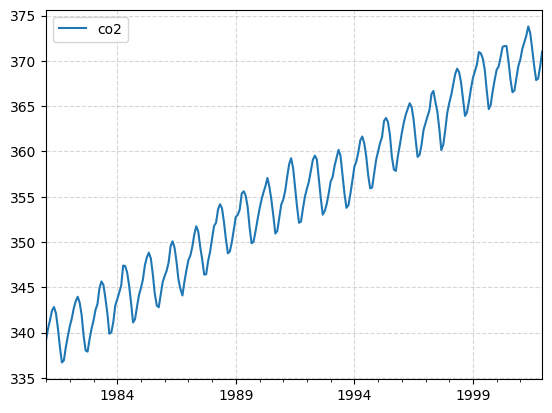

In [ ]:
#プロット

import matplotlib.pyplot as plt
co2_data.plot()

# グリッド線を追加
plt.grid(True, linestyle='--', alpha=0.5)

このグラフを見ると、一年の周期があるように伺える他、データ全体の傾向として増加しているというトレンドがあることがわかります。  

それでは、早速ADF検定を行い、データが定常であるかを確認しましょう。

In [ ]:
#ADF検定を行うことができるモジュールをインポート
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(co2_data)

# 結果を表示
print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
print('臨界値\t:')
for key, value in result[4].items():
    print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。")
else:
    print("時系列データは定常であるとは言えません。")

統計検定量	: -0.091566
p値	: 0.950272
臨界値	:
	1%	: -3.458
	5%	: -2.874
	10%	: -2.573
時系列データは定常であるとは言えません。


ADF検定の結果、今回のco2濃度データは定常ではないことがわかりました。  

この場合、このままARMAモデルにて予測モデルを作成してしまうと、不適切な予測結果が得られる可能性があります。

時系列データが定常でない場合、その原因の一つとして「トレンド」が存在することが挙げられます。トレンドとは、データが一定の方向に系統的に変化する傾向のことを指します。今回のデータでは、上昇トレンドがあることが伺えます。  

しかし、このような定常でないデータでも、隣り合う時点のデータの差のデータ（一回差分）は定常になるケースがあります。  
一回差分のデータというのはつまり、各時点における「1つ前の時点からの変化量」のデータです。  
トレンドが存在するデータから一回差分を取ると、一定のトレンドが除去され、データの性質が時間によらず一定になる場合があります。

それでは、一回差分を取ったデータを確認してみましょう。

<Figure size 1000x500 with 0 Axes>

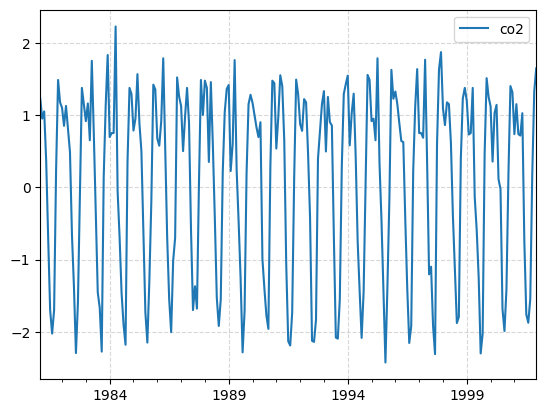

In [ ]:
#隣り合う時点の差のデータを作成
co2_data_diff = co2_data.diff().dropna()

#見やすいようにグラフの大きさを調整
plt.figure(figsize=(10, 5))

#表示
co2_data_diff.plot()

# グリッド線を追加
plt.grid(True, linestyle='--', alpha=0.5)

上昇トレンドの影響を取り除けていることがわかります。

次に、一回差分を取ったデータにおいてADF検定を行ない、定常性が存在するかを確認してみましょう。

In [ ]:
#ADF検定を行うことができるモジュールをインポート
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(co2_data_diff)

# 結果を表示
print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
print('臨界値\t:')
for key, value in result[4].items():
    print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。")
else:
    print("時系列データは定常であるとは言えません。")

統計検定量	: -3.505911
p値	: 0.007837
臨界値	:
	1%	: -3.458
	5%	: -2.874
	10%	: -2.573
時系列データは定常であると考えられます。


今回は、一回差分を取ったデータであれば定常であることがわかりました。  

もし一回差分を取っても定常性が得られない場合などは、二回差分（差の差）を取るなどすることで定常性が得られる場合があります。

ARIMAモデル(自己回帰和分移動平均, Autoregressive integrated moving average model)は、n回差分を取ることで定常性を獲得できるデータに対しての予測を行うことができるモデルです。  
差分を取った後は、ARMAモデルと同じ手法を用いて予測を行います。

それでは、AICを行い、過去の観測値と誤差項の適切な次数を選択し、予測を行いましょう。

In [ ]:
# 訓練データとテストデータを準備
len_test = 12
train = co2_data[:len(co2_data) -len_test]
test = co2_data[len(co2_data)-len_test:]

In [ ]:
#このセルの実行には時間がかかります(5,6分)
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# まずはモデルのパラメータの範囲を設定します
max_ar = 12  # ARの最大次数
max_ma = 3  # MAの最大次数

# 最小AICを無限大で初期化します
best_aic = np.inf
best_order = None

# すべてのパラメータの組み合わせに対してモデルをフィットします
for p in range(max_ar+1):
    for q in range(max_ma+1):
        try:
            # モデルを作成
            # pが予測に用いる過去の観測値の数、qが予測に用いる過去の誤差項の数です
            tmp_mdl = ARIMA(train, order=(p, 1, q))
            result = tmp_mdl.fit()
            tmp_aic = result.aic
            # AICが小さい場合は、モデルとパラメータを更新します
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, q)
        except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 194.40797 | order: (12, 2)


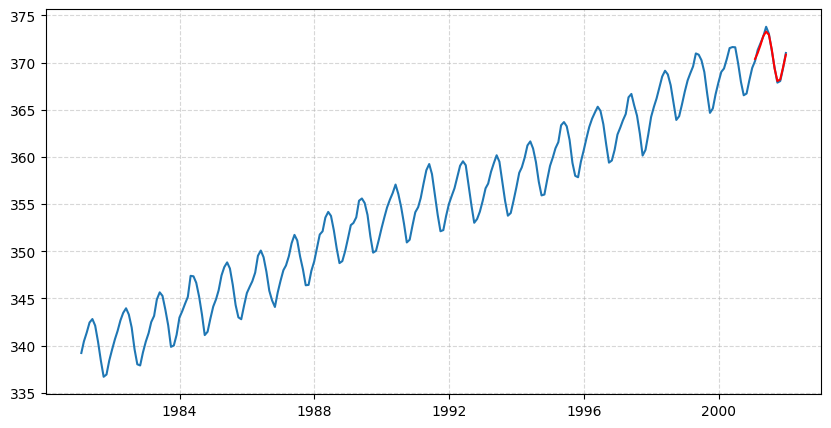

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)
ax.grid(True, linestyle='--', alpha=0.5)

#AICにおいてグリッドサーチを行い得られた結果から、p = 12, q = 2としてARMAモデルにて予測を行います
#order=(12, 1, 3)における1は、一回差分を意味します
arma_model = ARIMA(train, order=(12, 1, 2))
result = arma_model.fit()
forecast = result.forecast(len_test)

#青線（デフォルト）で大元のデータを表示
ax.plot(co2_data, ls="-")
#赤線で予測結果を表示
ax.plot(forecast, ls="-", color="r", label="predicted")

精度よく予測を行うことができていることが確認できます。

## 11.7 発展的なモデル
ゴール：今後の学習の選択肢を知る

今回の講義では、単変量時系列データのEDA・予測について学んできました。  
特に予測については、ARMAモデル、ARIMAモデルを用いて、将来のデータを予測することを学びました。  
しかし、授業冒頭でお話しした通り、今回扱った単変量時系列データ以外にも様々な形式の時系列データがあり、また様々な予測手法があります。  
本当は全てご紹介したいところですが時間が足りず... ということで、最後に今後の学習のロードマップの一例をご紹介し、本日の講義の時系列パートを終わりにさせていただければと考えております。

### 11.7.1 ARIMAモデルの進化系
キーワード：SARIMA、SARIMAX

先ほどご紹介したARIMAモデルによって、非定常なデータでも予測ができるようになりました。  
しかし、ARIMAモデルでは、季節性を持つデータ（例えば、年間を通じて特定の季節に売り上げが上がるあような売り上げデータ）に対しては、その予測性能が制約される可能性があります。  
SARIMA（季節自己回帰和分移動平均モデル, Seasonal AutoRegressive Integrated Moving Average model）では、季節的なトレンドも加味して予測することができ、季節性を持つデータに対してさらなる予測精度が期待されます。

また、SARIMAX（説明変数付き季節性自己回帰和分移動平均モデル, Seasonal Autoregressive Integrated Moving Average model）では、予測したい変数以外の変数も用いて予測を行うことができます。

これらモデルはpythonのライブラリで提供されています。

ARIMAモデルを学習したので、SARIMA、 SARIMAXモデルの概念は比較的理解しやすいはずです。ぜひ習得してみてください。

### 11.7.2 時系列手法の機械学習的アプローチ
キーワード：ニューラルネットワーク、RNN、LSTM

今日の講義では、統計的アプローチに焦点を当てて予測モデルをご紹介してきました。  
しかし、機械学習的アプローチも等しく重要です。  
機械学習的アプローチでは、非線形な関係や複雑なパターンを捉えながら予測を行うことができ、高い予測精度が期待されます。  

今回の講義では扱うことができませんでしたが、深層学習系(NNなど)の手法が特に有効であり、盛んに研究も行われている分野になります。

もし深層学習系アプローチにもご興味あれば、[松尾研のDL基礎講座](https://deeplearning.jp/lectures/dlb2023/)などのご受講いただければ幸いです。

今すぐ深層学習系アプローチを学習したい！という方には、[couseraの講義](https://www.coursera.org/learn/neural-networks-deep-learning)をお勧めします。（こちらは松尾研外部の講義であり、資料作成者の個人的なオススメとなります）

皆さんのさらなる学びへの一助となれば幸いです！